In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
from hera_cal.redcal import get_pos_reds
import matplotlib.colors as colors
%matplotlib inline

In [2]:
def Split_Hex_Array_With_Outriggers(sep = 14.7, hexNum = 11, splitCore = True, splitCoreOutriggers = 4):

    #Main Hex
    positions = [];
    for row in range(hexNum-1,-(hexNum)+splitCore,-1):
        for col in range(0,2*hexNum-abs(row)-1):
            xPos = ((-(2*hexNum-abs(row))+2)/2.0 + col)*sep;
            yPos = row*sep*3**.5/2;
            positions.append([xPos, yPos, 0])
            
    right = sep*np.asarray([1,0,0])
    up = sep*np.asarray([0,1,0])
    upRight = sep*np.asarray([.5,3**.5/2,0])
    upLeft = sep*np.asarray([-.5,3**.5/2,0])
    
    #Split the core into 3 pieces
    if splitCore:
        newPos = []
        for i,pos in enumerate(positions):          
            theta = np.arctan2(pos[1],pos[0])
            if (pos[0]==0 and pos[1]==0):
                newPos.append(pos)
            elif (theta > -np.pi/3 and theta < np.pi/3):
                newPos.append(np.asarray(pos) + (upRight + upLeft)/3)                    
            elif (theta >= np.pi/3 and theta < np.pi):
                newPos.append(np.asarray(pos) +upLeft  - (upRight + upLeft)/3)
            else:
                newPos.append(pos)
        positions = newPos

    # Add outriggers
    if splitCoreOutriggers:
        exteriorHexNum = splitCoreOutriggers
        for row in range(exteriorHexNum-1,-(exteriorHexNum),-1):
            for col in range(2*exteriorHexNum-abs(row)-1):
                xPos = ((-(2*exteriorHexNum-abs(row))+2)/2.0 + col)*sep*(hexNum-1)
                yPos = row*sep*(hexNum-1)*3**.5/2
                theta = np.arctan2(yPos,xPos)       
                if ((xPos**2 + yPos**2)**.5 > sep*(hexNum+1)):
                    if (theta > 0 and theta <= 2*np.pi/3+.01):
                        positions.append(np.asarray([xPos, yPos, 0]) - 4*(upRight + upLeft)/3)
                    elif (theta <= 0 and theta > -2*np.pi/3):
                        positions.append(np.asarray([xPos, yPos, 0])- 2*(upRight + upLeft)/3)
                    else:
                        positions.append(np.asarray([xPos, yPos, 0]) - 3*(upRight + upLeft)/3)
                        
    return {i: pos for i,pos in enumerate(np.array(positions))}

In [13]:
def plot_array(antpos):
    reds = get_pos_reds(antpos, bl_error_tol=1.0)
    print len(reds)
    ublvectors = np.array([antpos[red[0][0]] - antpos[red[0][1]] for red in reds])
    redundancy = np.array([len(red) for red in reds])
    allblv = np.vstack([ublvectors, -ublvectors])
    allredundancy = np.hstack([redundancy,redundancy])
    
    #    with plt.style.context(('dark_background')):
    with plt.style.context(('seaborn-notebook')):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
        
        ax = axes[0]
        positions = np.array([pos for pos in antpos.values()])
        ax.scatter(positions[:,0],positions[:,1], c=[.6,.6,.6], s=14, edgecolors='none',
                   linewidths=.25, norm=colors.LogNorm(vmin=1, vmax=3e2))
        ax.set_ylabel('Antenna Position (m)')
        ax.set_xlabel('Antenna Position (m)')
        ax.set_xlim([-460,460])
        ax.set_ylim([-460,460])
        ax.set_aspect('equal')

        ax = axes[1]
        sc = ax.scatter(allblv[:,0],allblv[:,1], c=allredundancy, cmap='inferno', s=3.5, edgecolors='none',
                        linewidths=0, norm=colors.LogNorm(vmin=1, vmax=3e2))
        ax.set_ylabel('Baseline (m)')
        ax.set_xlabel('Baseline (m)')
        ax.set_xlim([-500,500])
        ax.set_ylim([-500,500]) 
        ax.set_aspect('equal')
        plt.colorbar(sc, ax=ax, label='Simultaneous Redundancy')

# Array Configurations

HERA-331 (No Split) Unique Baselines:
630


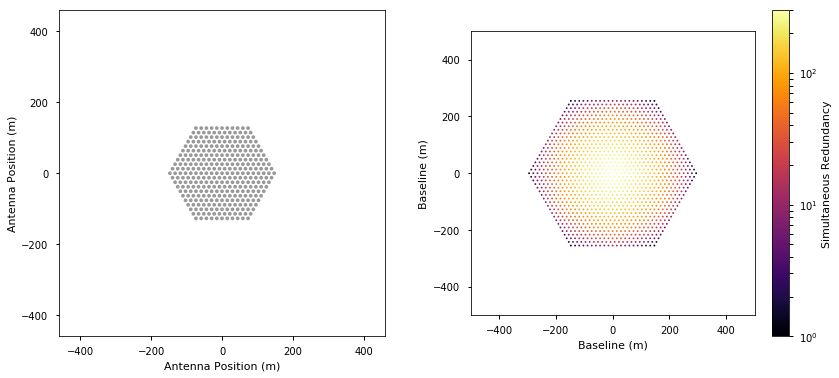

In [14]:
HERA331 = Split_Hex_Array_With_Outriggers(sep = 14.7, hexNum = 11, splitCore = False, splitCoreOutriggers = 0)
print 'HERA-331 (No Split) Unique Baselines:'
plot_array(HERA331)

HERA-320 Core Unique Baselines:
1501


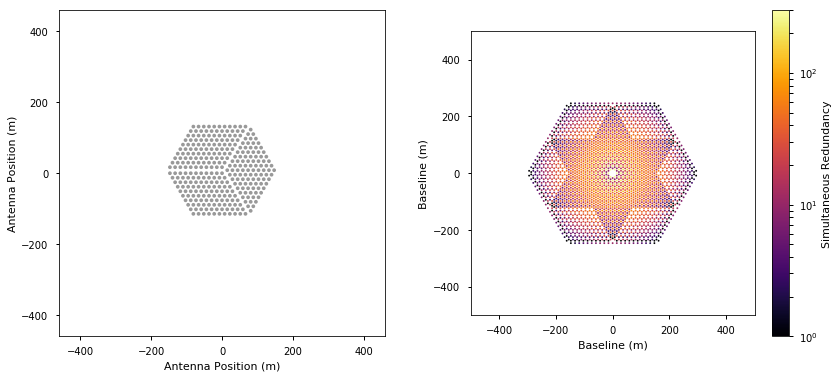

In [15]:
HERA320 = Split_Hex_Array_With_Outriggers(sep = 14.7, hexNum = 11, splitCore = True, splitCoreOutriggers = 0)
print 'HERA-320 Core Unique Baselines:'
plot_array(HERA320)

HERA-350 (With Outriggers) Unique Baselines:
6610


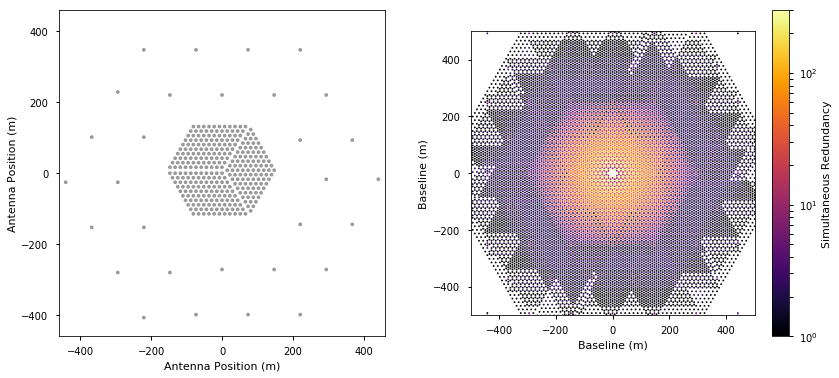

In [16]:
HERA350 = Split_Hex_Array_With_Outriggers(sep = 14.7, hexNum = 11, splitCore = True, splitCoreOutriggers = 4)
print 'HERA-350 (With Outriggers) Unique Baselines:'
plot_array(HERA350)